In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


Upload notMNIST.npz

In [0]:
from google.colab import files
uploaded = files.upload()

Saving notMNIST.npz to notMNIST.npz


In [0]:
import tensorflow as tf
import numpy as np

print("--Get data--")
with np.load("notMNIST.npz", allow_pickle=True) as f:
    x_train, y_train = f['x_train'], f['y_train']
    x_test, y_test = f['x_test'], f['y_test']

print("--Process data--")
print(len(y_train))
x_train, x_test = x_train / 255.0, x_test / 255.0
 
print("--Make model--")
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(397, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("--Fit model--")
model.fit(x_train, y_train, epochs=15, verbose=2)

print("--Evaluate model--")
model_loss, model_acc = model.evaluate(x_test,  y_test, verbose=2)
print(f"Model Loss:    {model_loss:.2f}")
print(f"Model Accuray: {model_acc*100:.1f}%")

--Get data--


FileNotFoundError: ignored

In [0]:
print("--Get data--")
with np.load("notMNIST.npz", allow_pickle=True) as f:
    x_train, y_train = f['x_train'], f['y_train']
    x_test, y_test = f['x_test'], f['y_test']

print("--Process data--")
print(len(y_train))
x_train, x_test = x_train / 255.0, x_test / 255.0

#reshape data to fit model
#x_train = x_train.reshape(60000,28,28,1)
#x_test = x_test.reshape(10000,28,28,1)
 
#reshape #2
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

print("--Make model--")
better_model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation="relu", input_shape=(28, 28,1)),
   tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])



better_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("--Fit model--")
history = better_model.fit(x_train, y_train, epochs=3, verbose=1, validation_split=0.15)

print("--Evaluate model--")
model_loss, model_acc = better_model.evaluate(x_test,  y_test, verbose=2)
print(f"Model Loss:    {model_loss:.2f}")
print(f"Model Accuray: {model_acc*100:.1f}%")

--Get data--
--Process data--
60000
--Make model--
--Fit model--
Train on 51000 samples, validate on 9000 samples
Epoch 1/3
51000/51000 [==============================] - 11s 208us/sample - loss: 0.4435 - accuracy: 0.8695 - val_loss: 0.3768 - val_accuracy: 0.8890
Epoch 2/3
51000/51000 [==============================] - 7s 128us/sample - loss: 0.2900 - accuracy: 0.9115 - val_loss: 0.3496 - val_accuracy: 0.8971
Epoch 3/3
51000/51000 [==============================] - 7s 135us/sample - loss: 0.2014 - accuracy: 0.9374 - val_loss: 0.3673 - val_accuracy: 0.8973
--Evaluate model--
10000/1 - 1s - loss: 0.0878 - accuracy: 0.9535
Model Loss:    0.17
Model Accuray: 95.3%


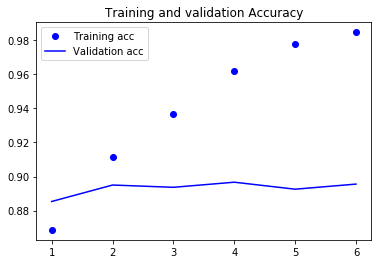

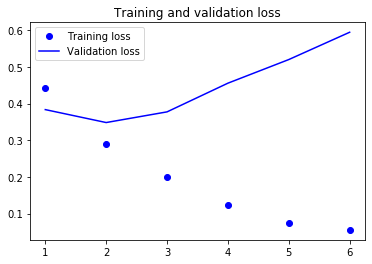

In [0]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
#Save Model to notMNIST.h5
better_model.save("notMNIST_z.h5")

In [0]:
from google.colab import files
files.download("notMNIST_z.h5")